## Author

**Full Name: Yiğit Yalın**

**Student ID: 22002178**

### Importing the required libraries

In [1]:
from enum import IntEnum
from itertools import count
from tabulate import tabulate
from typing import Union

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=5)

# Question 1

## Enumerating the States

In [2]:
class States(IntEnum):
    FIRST_CIGARETTE = 0
    MEET_FRIENDS = 1
    COFFEE = 2
    ANOTHER_CIGARETTE = 3
    LAST_CIGARETTE = 4
    SLEEP = 5

## Constructing the reward vector

In [3]:
R = np.array([1, 1, 2, 1, -3, 0])

print(tabulate(zip(map(lambda state: state.name, States), R), 
               headers=["State", "Reward"], tablefmt="fancy_grid"))

╒═══════════════════╤══════════╕
│ State             │   Reward │
╞═══════════════════╪══════════╡
│ FIRST_CIGARETTE   │        1 │
├───────────────────┼──────────┤
│ MEET_FRIENDS      │        1 │
├───────────────────┼──────────┤
│ COFFEE            │        2 │
├───────────────────┼──────────┤
│ ANOTHER_CIGARETTE │        1 │
├───────────────────┼──────────┤
│ LAST_CIGARETTE    │       -3 │
├───────────────────┼──────────┤
│ SLEEP             │        0 │
╘═══════════════════╧══════════╛


## Constructing the One-Step Transition Matrix

In [4]:
P = np.array([
    [0, 0.6, 0.3, 0, 0, 0.1],
    [0, 0, 0.4, 0.4, 0.1, 0.1],
    [0, 0, 0, 0.7, 0, 0.3],
    [0, 0, 0, 0.6, 0.3, 0.1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1]
])

print(P)

[[0.  0.6 0.3 0.  0.  0.1]
 [0.  0.  0.4 0.4 0.1 0.1]
 [0.  0.  0.  0.7 0.  0.3]
 [0.  0.  0.  0.6 0.3 0.1]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1. ]]


## Finding the stationary probability distribution

The stationary probability distribution has to satisfy the following equation:

$$\pi = \pi P$$

* $\pi$ is the stationary distribution which is a (1 x 6) matrix.
* $P$ is the one step transition matrix which is a (6 x 6) matrix.

In general, we obtain the stationary probability distribution by solving the equation $\pi = \pi P$. However, in this case, we already know that Sleep is the terminal state, and we can use this information to predict the stationary distribution.

Consider the following distribution:

$$
\pi = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

Let's see whether this distribution satisfies the equation $\pi = \pi P$.

In [5]:
pi = np.array([0., 0., 0., 0., 0., 1.])

print(pi)

[0. 0. 0. 0. 0. 1.]


In [6]:
print(pi @ P)

[0. 0. 0. 0. 0. 1.]


In [7]:
all(np.equal(pi, pi @ P))

True

Hence, the stationary distribution is:

$$
\pi = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

## Finding the state values

The state value function of state is given as follows:

$$v(s) = \mathbf{E}[R_{t+1} + \gamma v(S_{t+1})| S_t = s] $$

This is equivalent to the following:

$$v(s) = R_s + \gamma \sum \limits_{s^\prime \in S} P_{ss^\prime} v(s^\prime)$$

In a vectorized form,

$$v = R + \gamma P v$$

Then, we can obtain v by solving this system of linear equations as follows:

$$v = (I_6 - \gamma P)^{-1}R$$

* $v$ is a (6 x 1) matrix with the values of each state
* $I_6$ is the (6 x 6) identity matrix.
* $R$ is a (6 x 1) matrix with the immediate rewards of the states

### The following code pieces calculate the state values for discount factor $\gamma = 0.1$ using different methods.

**This code piece calculates the state values for discount factor $\gamma = 0.1$ by solving the system of linear equations.**

In [8]:
gamma = 0.1  # the discount factor is 0.1
v = np.linalg.inv(np.identity(6) - gamma * P) @ R

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒═══════════════════╤═══════════╕
│ State             │     Value │
╞═══════════════════╪═══════════╡
│ FIRST_CIGARETTE   │  1.12752  │
├───────────────────┼───────────┤
│ MEET_FRIENDS      │  1.09143  │
├───────────────────┼───────────┤
│ COFFEE            │  2.06777  │
├───────────────────┼───────────┤
│ ANOTHER_CIGARETTE │  0.968085 │
├───────────────────┼───────────┤
│ LAST_CIGARETTE    │ -3        │
├───────────────────┼───────────┤
│ SLEEP             │  0        │
╘═══════════════════╧═══════════╛


**This code piece calculates the state values for discount factor $\gamma = 0.1$ using dynamic programming.**

In [9]:
gamma = 0.1

v = np.zeros(6)

for _ in range(1000):
    v_new = np.zeros(6)
    for state in States:
        v_new[state] += R[state]
        s = np.sum([P[state][next_state] * v[next_state] for next_state in States])
        v_new[state] += s * gamma
    v = v_new

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒═══════════════════╤═══════════╕
│ State             │     Value │
╞═══════════════════╪═══════════╡
│ FIRST_CIGARETTE   │  1.12752  │
├───────────────────┼───────────┤
│ MEET_FRIENDS      │  1.09143  │
├───────────────────┼───────────┤
│ COFFEE            │  2.06777  │
├───────────────────┼───────────┤
│ ANOTHER_CIGARETTE │  0.968085 │
├───────────────────┼───────────┤
│ LAST_CIGARETTE    │ -3        │
├───────────────────┼───────────┤
│ SLEEP             │  0        │
╘═══════════════════╧═══════════╛


### The following code pieces calculate the state values for discount factor $\gamma = 0.9$ using different methods.

**This code piece calculates the state values for discount factor $\gamma = 0.9$ by solving the system of linear equations.**

In [10]:
gamma = 0.9  # the discount factor is 0.9
v = np.linalg.inv(np.identity(6) - gamma * P) @ R

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒═══════════════════╤═══════════╕
│ State             │     Value │
╞═══════════════════╪═══════════╡
│ FIRST_CIGARETTE   │  2.52414  │
├───────────────────┼───────────┤
│ MEET_FRIENDS      │  1.69237  │
├───────────────────┼───────────┤
│ COFFEE            │  2.26022  │
├───────────────────┼───────────┤
│ ANOTHER_CIGARETTE │  0.413043 │
├───────────────────┼───────────┤
│ LAST_CIGARETTE    │ -3        │
├───────────────────┼───────────┤
│ SLEEP             │  0        │
╘═══════════════════╧═══════════╛


**This code piece calculates the state values for discount factor $\gamma = 0.9$ using dynamic programming.**

In [11]:
gamma = 0.9

v = np.zeros(6)

for _ in range(1000):
    v_new = np.zeros(6)
    for state in States:
        v_new[state] += R[state]
        s = np.sum([P[state][next_state] * v[next_state] for next_state in States])
        v_new[state] += s * gamma
    v = v_new

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒═══════════════════╤═══════════╕
│ State             │     Value │
╞═══════════════════╪═══════════╡
│ FIRST_CIGARETTE   │  2.52414  │
├───────────────────┼───────────┤
│ MEET_FRIENDS      │  1.69237  │
├───────────────────┼───────────┤
│ COFFEE            │  2.26022  │
├───────────────────┼───────────┤
│ ANOTHER_CIGARETTE │  0.413043 │
├───────────────────┼───────────┤
│ LAST_CIGARETTE    │ -3        │
├───────────────────┼───────────┤
│ SLEEP             │  0        │
╘═══════════════════╧═══════════╛


We can easily observe that the state "Coffee" has the highest value for discount factor $\gamma = 0.1$ whereas the state "First Cigarette" has the highest value for discount factor $\gamma = 0.9$.

For lower discount factors such as 0.1, the delayed rewards have less impact on the state values.

Let's recall the rewards:

In [12]:
print(tabulate(zip(map(lambda state: state.name, States), R), 
               headers=["State", "Reward"], tablefmt="fancy_grid"))

╒═══════════════════╤══════════╕
│ State             │   Reward │
╞═══════════════════╪══════════╡
│ FIRST_CIGARETTE   │        1 │
├───────────────────┼──────────┤
│ MEET_FRIENDS      │        1 │
├───────────────────┼──────────┤
│ COFFEE            │        2 │
├───────────────────┼──────────┤
│ ANOTHER_CIGARETTE │        1 │
├───────────────────┼──────────┤
│ LAST_CIGARETTE    │       -3 │
├───────────────────┼──────────┤
│ SLEEP             │        0 │
╘═══════════════════╧══════════╛


For discount factor $\gamma = 0.1$, the state "Coffee" has the highest value. This is because it has the highest immediate reward and the later states have low effect on the state value due to the low discount factor. However, when discount factor $\gamma = 0.9$, the state "First Cigarette" has the highest value since the value of the state "First Cigarette" embodies the weighted sum of discounted values of later states (recall the state value equation), and due to the high discount factor, the delayed rewards have high impact on the state value.

# Question 2

## Enumerating the states

In [13]:
class States(IntEnum):
    DEPRESSED = 0
    SLEEP = 1
    MORE_SLEEP = 2
    FITNESS_RECOVERY = 3
    TENNIS_PRACTICE = 4
    WIN_THE_MATCH = 5

## Enumerating the actions

In [14]:
class Actions(IntEnum):
    ACTIVE = 0
    PASSIVE = 1

## Constructing the reward vector

In [15]:
R = np.array([-1, -1, -1, -1, -1, 0])

print(tabulate(zip(map(lambda state: state.name, States), R), 
               headers=["State", "Reward"], tablefmt="fancy_grid"))

╒══════════════════╤══════════╕
│ State            │   Reward │
╞══════════════════╪══════════╡
│ DEPRESSED        │       -1 │
├──────────────────┼──────────┤
│ SLEEP            │       -1 │
├──────────────────┼──────────┤
│ MORE_SLEEP       │       -1 │
├──────────────────┼──────────┤
│ FITNESS_RECOVERY │       -1 │
├──────────────────┼──────────┤
│ TENNIS_PRACTICE  │       -1 │
├──────────────────┼──────────┤
│ WIN_THE_MATCH    │        0 │
╘══════════════════╧══════════╛


## Constructing the One-Step Transition Matrix for each action

**The one-step transition matrix for the action "Active"**:

In [16]:
P_active = np.array([
    [0.7, 0, 0, 0.3, 0, 0],
    [0, 0, 0.4, 0.6, 0, 0],
    [0, 0, 0.5, 0, 0.5, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0.1, 0.9],
    [0, 0, 0, 0, 0, 1]
])

print(P_active)

[[0.7 0.  0.  0.3 0.  0. ]
 [0.  0.  0.4 0.6 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.1 0.9]
 [0.  0.  0.  0.  0.  1. ]]


**The one-step transition matrix for the action "Passive"**:

In [17]:
P_passive = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0.8, 0.2],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1]
])

print(P_passive)

[[0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.8 0.2]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]]


The following code piece is an implementation detail. P is the concatenation of matrices P_active and P_passive.

In [18]:
P = np.concatenate([P_active[np.newaxis, ...], P_passive[np.newaxis, ...]], axis=0)

print('One-step transition matrix for the action "Active":', P[Actions.ACTIVE], '', 
      'One-step transition matrix for the action "Passive":', P[Actions.PASSIVE], sep="\n")

One-step transition matrix for the action "Active":
[[0.7 0.  0.  0.3 0.  0. ]
 [0.  0.  0.4 0.6 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.1 0.9]
 [0.  0.  0.  0.  0.  1. ]]

One-step transition matrix for the action "Passive":
[[0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.8 0.2]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]]


## Finding the state values

The state value function of state is given as follows:

$$v(s) = \mathbf{E}[R_{t+1} + \gamma v(S_{t+1})| S_t = s] $$

This is equivalent to the following:

$$v(s) = R_s + \gamma \sum \limits_{s^\prime \in S} P_{ss^\prime} v(s^\prime)$$

### The following code pieces calculate the state values for different policies discount factor $\gamma = 0.9$ using different methods.

**This code piece calculates the state values for "Active" policy by solving the system of linear equations.**

In [19]:
gamma = 0.9  # the discount factor is 0.9
v = np.linalg.inv(np.identity(6) - gamma * P[Actions.ACTIVE]) @ R

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒══════════════════╤══════════╕
│ State            │    Value │
╞══════════════════╪══════════╡
│ DEPRESSED        │ -4.15414 │
├──────────────────┼──────────┤
│ SLEEP            │ -3.05229 │
├──────────────────┼──────────┤
│ MORE_SLEEP       │ -2.71728 │
├──────────────────┼──────────┤
│ FITNESS_RECOVERY │ -1.98901 │
├──────────────────┼──────────┤
│ TENNIS_PRACTICE  │ -1.0989  │
├──────────────────┼──────────┤
│ WIN_THE_MATCH    │  0       │
╘══════════════════╧══════════╛


**This code piece calculates the state values for "Active" policy by dynamic programming.**

In [20]:
gamma = 0.9

v = np.zeros(6)

for _ in range(1000):
    v_new = np.zeros(6)
    for state in States:
        v_new[state] += R[state]
        s = np.sum([P[Actions.ACTIVE][state][next_state] * v[next_state] for next_state in States])
        v_new[state] += s * gamma
    v = v_new

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒══════════════════╤══════════╕
│ State            │    Value │
╞══════════════════╪══════════╡
│ DEPRESSED        │ -4.15414 │
├──────────────────┼──────────┤
│ SLEEP            │ -3.05229 │
├──────────────────┼──────────┤
│ MORE_SLEEP       │ -2.71728 │
├──────────────────┼──────────┤
│ FITNESS_RECOVERY │ -1.98901 │
├──────────────────┼──────────┤
│ TENNIS_PRACTICE  │ -1.0989  │
├──────────────────┼──────────┤
│ WIN_THE_MATCH    │  0       │
╘══════════════════╧══════════╛


**This code piece calculates the state values for "Passive" policy by solving the system of linear equations.**

In [21]:
gamma = 0.9  # the discount factor is 0.9
v = np.linalg.inv(np.identity(6) - gamma * P[Actions.PASSIVE]) @ R

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒══════════════════╤═════════╕
│ State            │   Value │
╞══════════════════╪═════════╡
│ DEPRESSED        │   -10   │
├──────────────────┼─────────┤
│ SLEEP            │   -10   │
├──────────────────┼─────────┤
│ MORE_SLEEP       │   -10   │
├──────────────────┼─────────┤
│ FITNESS_RECOVERY │    -8.2 │
├──────────────────┼─────────┤
│ TENNIS_PRACTICE  │   -10   │
├──────────────────┼─────────┤
│ WIN_THE_MATCH    │     0   │
╘══════════════════╧═════════╛


**This code piece calculates the state values for "Passive" policy by dynamic programming.**

In [22]:
gamma = 0.9

v = np.zeros(6)

for _ in range(1000):
    v_new = np.zeros(6)
    for state in States:
        v_new[state] += R[state]
        s = np.sum([P[Actions.PASSIVE][state][next_state] * v[next_state] for next_state in States])
        v_new[state] += s * gamma
    v = v_new

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒══════════════════╤═════════╕
│ State            │   Value │
╞══════════════════╪═════════╡
│ DEPRESSED        │   -10   │
├──────────────────┼─────────┤
│ SLEEP            │   -10   │
├──────────────────┼─────────┤
│ MORE_SLEEP       │   -10   │
├──────────────────┼─────────┤
│ FITNESS_RECOVERY │    -8.2 │
├──────────────────┼─────────┤
│ TENNIS_PRACTICE  │   -10   │
├──────────────────┼─────────┤
│ WIN_THE_MATCH    │     0   │
╘══════════════════╧═════════╛


## Calculate state-action values

The state action value function is given as follows:

$$q_\pi(s, a) = \mathbf{E} [R_{t + 1} + \gamma q_\pi(S_{t + 1}, A_{t + 1}) | S_t = s, A_t = a]$$

This is equivalent to the following:

$$q_\pi(s,a) = R_s^{a} + \gamma \sum \limits_{s^\prime \in S} P_{ss^\prime}^{a} \sum \limits_{a^\prime \in A} \pi(a^\prime | s^\prime) q_\pi(s^\prime, a^\prime)$$

### The following code pieces calculate the state-action values for discount factor $\gamma = 0.9$.

**This code piece calculates the state-action values for given policy with $\alpha = 0.5$.**

In [23]:
gamma = 0.9
alpha = 0.5  # the probability of choosing the "Active" action

# rows represent the states and
# columns represent the Active and Passive policies respectively
q = np.zeros((6, 2))

for _ in range(1000):
    q_new = np.zeros((6, 2))
    for state in States:
        for action in Actions:
            q_new[state][action] += R[state]
            s = np.sum([
                P[action][state][next_state] * np.sum([
                    ((1 - next_action) * alpha + next_action * (1 - alpha)) * q[next_state][next_action] 
                    for next_action in Actions
                ])
                for next_state in States
            ])
            q_new[state][action] += s * gamma
    q = q_new

print(tabulate(zip(map(lambda state: state.name, States), q[..., Actions.ACTIVE], q[..., Actions.PASSIVE]), 
               headers=["State", "Active", "Passive"], tablefmt="fancy_grid"))

╒══════════════════╤══════════╤═══════════╕
│ State            │   Active │   Passive │
╞══════════════════╪══════════╪═══════════╡
│ DEPRESSED        │ -5.82933 │  -6.07177 │
├──────────────────┼──────────┼───────────┤
│ SLEEP            │ -5.19229 │  -6.0783  │
├──────────────────┼──────────┼───────────┤
│ MORE_SLEEP       │ -5.20681 │  -6.0783  │
├──────────────────┼──────────┼───────────┤
│ FITNESS_RECOVERY │ -4.33533 │  -3.66826 │
├──────────────────┼──────────┼───────────┤
│ TENNIS_PRACTICE  │ -1.33353 │  -6.0783  │
├──────────────────┼──────────┼───────────┤
│ WIN_THE_MATCH    │  0       │   0       │
╘══════════════════╧══════════╧═══════════╛


**This code piece calculates the state-action values for given policy with different $\alpha$ values.**

In [24]:
q_values = dict()
gamma = 0.9

for alpha in count(0, 0.05):
    alpha = np.round(alpha, 2)
    
    if alpha > 1:
        break
        
    q = np.zeros((6, 2))

    for _ in range(1000):
        q_new = np.zeros((6, 2))
        for state in States:
            for action in Actions:
                q_new[state][action] += R[state]
                s = np.sum([
                    P[action][state][next_state] * np.sum([
                        ((1 - next_action) * alpha + next_action * (1 - alpha)) * q[next_state][next_action] 
                        for next_action in Actions
                    ])
                    for next_state in States
                ])
                q_new[state][action] += s * gamma
        q = q_new

    
    q_values[alpha] = q

# print the q values for some alpha values
for alpha, q in list(q_values.items())[4:len(q_values) - 4:4]:
    print(tabulate(zip(map(lambda state: state.name, States), q[..., Actions.ACTIVE], q[..., Actions.PASSIVE]), 
                   headers=[f"State (alpha = {alpha})", "Active", "Passive"], tablefmt="fancy_grid"))

╒═══════════════════════╤══════════╤═══════════╕
│ State (alpha = 0.2)   │   Active │   Passive │
╞═══════════════════════╪══════════╪═══════════╡
│ DEPRESSED             │ -8.28492 │  -8.82091 │
├───────────────────────┼──────────┼───────────┤
│ SLEEP                 │ -7.75956 │  -8.92248 │
├───────────────────────┼──────────┼───────────┤
│ MORE_SLEEP            │ -8.32386 │  -8.92248 │
├───────────────────────┼──────────┼───────────┤
│ FITNESS_RECOVERY      │ -7.72524 │  -6.38019 │
├───────────────────────┼──────────┼───────────┤
│ TENNIS_PRACTICE       │ -1.67252 │  -8.92248 │
├───────────────────────┼──────────┼───────────┤
│ WIN_THE_MATCH         │  0       │   0       │
╘═══════════════════════╧══════════╧═══════════╛
╒═══════════════════════╤══════════╤═══════════╕
│ State (alpha = 0.4)   │   Active │   Passive │
╞═══════════════════════╪══════════╪═══════════╡
│ DEPRESSED             │ -6.54339 │  -6.90275 │
├───────────────────────┼──────────┼───────────┤
│ SLEEP             

## Calculating the state values using state-action values

The relationship between the state values and state-action values is given as:

$$v_\pi(s) = \sum \limits_{a \in A} \pi(a | s) q_\pi(s, a)$$

In [25]:
values = {
    alpha: np.array([
        np.sum([((1 - action) * alpha + action * (1 - alpha)) * q[state][action] for action in Actions]) 
        for state in States
    ])
    for alpha, q in q_values.items()
}

# print the state values for some alpha values
for alpha, v in list(values.items())[::4]:
    print(tabulate(zip(map(lambda state: state.name, States), v), 
                   headers=[f"State (alpha = {alpha})", "Value"], tablefmt="fancy_grid"))

╒═════════════════════╤═════════╕
│ State (alpha = 0)   │   Value │
╞═════════════════════╪═════════╡
│ DEPRESSED           │   -10   │
├─────────────────────┼─────────┤
│ SLEEP               │   -10   │
├─────────────────────┼─────────┤
│ MORE_SLEEP          │   -10   │
├─────────────────────┼─────────┤
│ FITNESS_RECOVERY    │    -8.2 │
├─────────────────────┼─────────┤
│ TENNIS_PRACTICE     │   -10   │
├─────────────────────┼─────────┤
│ WIN_THE_MATCH       │     0   │
╘═════════════════════╧═════════╛
╒═══════════════════════╤══════════╕
│ State (alpha = 0.2)   │    Value │
╞═══════════════════════╪══════════╡
│ DEPRESSED             │ -8.71371 │
├───────────────────────┼──────────┤
│ SLEEP                 │ -8.6899  │
├───────────────────────┼──────────┤
│ MORE_SLEEP            │ -8.80276 │
├───────────────────────┼──────────┤
│ FITNESS_RECOVERY      │ -6.6492  │
├───────────────────────┼──────────┤
│ TENNIS_PRACTICE       │ -7.47249 │
├───────────────────────┼──────────┤
│ WIN_THE

We can observe that the edge cases ($\alpha = 0$ and $\alpha = 1.0$) match the previous results.

**We can also use the following equation to calculate state values:**

$$
    v = (I_6 - \gamma (\alpha P_{active} + (1 - \alpha)P_{passive})^{-1}R
$$

In [26]:
values = {
    alpha: np.linalg.inv(np.identity(6) - gamma * (alpha * P[Actions.ACTIVE] + (1 - alpha) * P[Actions.PASSIVE])) @ R
    for alpha in q_values.keys()
}

for alpha, v in list(values.items())[::4]:
    print(tabulate(zip(map(lambda state: state.name, States), v),
                   headers=[f"State (alpha = {alpha})", "Value"], tablefmt="fancy_grid"))

╒═════════════════════╤═════════╕
│ State (alpha = 0)   │   Value │
╞═════════════════════╪═════════╡
│ DEPRESSED           │   -10   │
├─────────────────────┼─────────┤
│ SLEEP               │   -10   │
├─────────────────────┼─────────┤
│ MORE_SLEEP          │   -10   │
├─────────────────────┼─────────┤
│ FITNESS_RECOVERY    │    -8.2 │
├─────────────────────┼─────────┤
│ TENNIS_PRACTICE     │   -10   │
├─────────────────────┼─────────┤
│ WIN_THE_MATCH       │     0   │
╘═════════════════════╧═════════╛
╒═══════════════════════╤══════════╕
│ State (alpha = 0.2)   │    Value │
╞═══════════════════════╪══════════╡
│ DEPRESSED             │ -8.71371 │
├───────────────────────┼──────────┤
│ SLEEP                 │ -8.6899  │
├───────────────────────┼──────────┤
│ MORE_SLEEP            │ -8.80276 │
├───────────────────────┼──────────┤
│ FITNESS_RECOVERY      │ -6.6492  │
├───────────────────────┼──────────┤
│ TENNIS_PRACTICE       │ -7.47249 │
├───────────────────────┼──────────┤
│ WIN_THE

### Visualize the data for each state as a function of $\alpha$

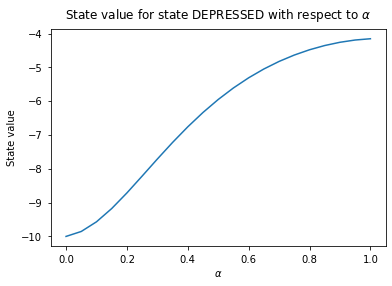

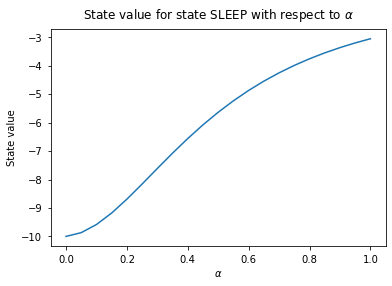

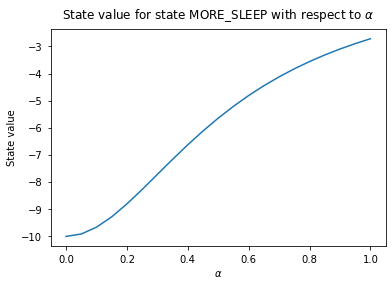

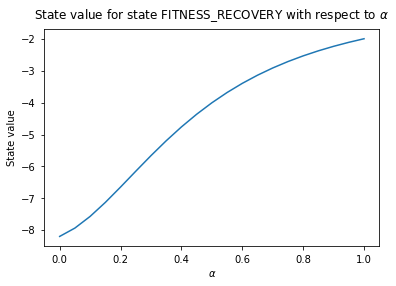

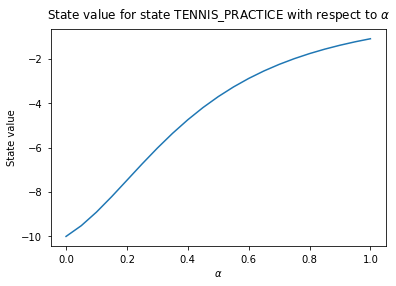

In [27]:
for state in States:
    if state is States.WIN_THE_MATCH:
        continue
        
    state_values = np.array([
        value[state] for value in values.values()
    ])
        
    plt.figure()
    plt.title(rf"State value for state {state.name} with respect to $\alpha$", pad=10)
    plt.xlabel(r"$\alpha$")
    plt.ylabel("State value")
    
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', pad=5)

    plt.plot(np.array(list(values.keys())), state_values)
    plt.show()

We can observe that the state values increase as $\alpha$ increases. Since $\alpha$ is the probability of taking the "Active" action, the results indicate that the "Active" action gives better results for all states.